In [1]:
# # usage1 = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss
# a = np.ones((int(1e4), int(1e5)))
# # del a
# b = np.ones((int(5e4), int(1e5)))
# # del b
# c = np.ones((int(5e4), int(1e5)))
# # del c

In [2]:
#goal- mu1_arr by mu2_arr array where each index is the S2 matrix 
# need to implement with minimum memory

# have verified that chromo vertex matches original chromo_bind_exact

In [3]:
# import chromo

In [4]:
import numpy as np


########### PARAMETERS #########

chi = 0

n_bind = 2 #types of proteins/marks

e_m = np.array([-1.5, -1.5]) #binding energy

# v_int = np.array([[-3.92,0],[0,-3.92]]) # protein-protein interaction param
# v_int = np.array([[0,3.92],[3.92,0]]) # protein-protein interaction param
v_int = np.array([[0,0],[0,0]]) # protein-protein interaction param


phi_c = 0.6# avg amount of chromosome 
# phi_c = 1.# avg amount of chromosome 

marks_1 = [0,2,1,0,2,1] # marks for protein 1
marks_2 = [1,1,1,0,2,2] # marks for protein 2


# fraction of nucleosomes with 0,1,2 marks per protein type, calculated form marks1, marks2: 
f_om = np.array([(np.array(marks_1)==0).sum(),(np.array(marks_1)==1).sum(),(np.array(marks_1)==2).sum(), \
                    (np.array(marks_2)==0).sum(),(np.array(marks_2)==1).sum(),(np.array(marks_2)==2).sum()])/len(marks_1)
poly_marks = [marks_1, marks_2]

# l_p = 53 # 53 nm
# bp_p_b = 45 # base pairs per bond
# nm_p_bp = 0.34 # nanometetrs per base pair
# b = l_p * 2 #kuhn length

# N = (len(marks_1)-1) * bp_p_b * nm_p_bp * (1/b)
# N_m = N/(len(marks_1)-1)

b = 1
N_m = 1000
N = N_m * len(marks_1)

mu_max = 10
mu_min = -10
del_mu = 1
#denisty map setting
mu1_array = np.arange(mu_min, mu_max, del_mu)#[-5]
mu2_array = np.arange(mu_min, mu_max, del_mu)#[-5]


########### FUNCTIONS #########


# need to produce rank 2 tensor that, given two protein types, 
# find avg of product of s for index ij
# def eval_sisj_bind_shlk(f_bars, mu, e_m, v_int, f_om, phi_c, poly_marks, gam1_ind, gam2_ind):
#     '''
#     poly marks (array of arrays) contains an array of marks per nucleosome for each protein type
#     gam1_ind (int) is the index of first protein
#     gam2_ind (int) is the index of second protein
#     '''
    
#     n_bind = len(mu)
#     # evaluate eqn 85 for each index ij
 
#     phi_bind = phi_c * np.array(f_bars)

#     erg_int = np.matmul(phi_bind, v_int) #sum over gamma 2 of int and phi and f
    
#     coef1 = -erg_int[gam1_ind] + mu[gam1_ind] 
#     coef2 = -erg_int[gam2_ind] + mu[gam2_ind]
    
    
#     #make vector form of f_bind
#     f_bind_g1_s1 = eval_f_bind_vec(1, poly_marks[gam1_ind], e_m[gam1_ind])
#     f_bind_g1_s2 = eval_f_bind_vec(2, poly_marks[gam1_ind], e_m[gam1_ind])
#     f_bind_g2_s1 = eval_f_bind_vec(1, poly_marks[gam2_ind], e_m[gam2_ind])
#     f_bind_g2_s2 = eval_f_bind_vec(2, poly_marks[gam2_ind], e_m[gam2_ind])
    
#     #combine coef and f_bind to create 4 dif energies needed
# #     - each should be rank 2 tensors
    
#     exp_g1_s1 = np.exp(coef1 - f_bind_g1_s1)  #energy at each nucleosome if one gamma 1 protein bound
#     exp_g1_s2 = np.exp(2*coef1 - f_bind_g1_s2)
#     exp_g2_s1 = np.exp(coef2 - f_bind_g2_s1)
#     exp_g2_s2 = np.exp(2*coef2 - f_bind_g2_s2)

#     sisj_bind_numerator = 0
#     q = 1 + np.outer(exp_g1_s1, np.ones(len(exp_g1_s1))) + np.outer(exp_g2_s1, np.ones(len(exp_g1_s1))).T\
#     + np.outer(exp_g1_s2,np.ones(len(exp_g1_s1))) + np.outer(exp_g2_s2, np.ones(len(exp_g1_s1))).T
    
#     exp_11 = np.outer(exp_g1_s1, exp_g2_s1) #getting combined probability at each nucleosome pair
#     sisj_bind_numerator += exp_11
#     q += exp_11
#     del exp_11
    
#     exp_12 = np.outer(exp_g1_s1, exp_g2_s2)
#     sisj_bind_numerator += 2*exp_12
#     q += exp_12
#     del exp_12   
    
#     exp_21 = np.outer(exp_g1_s2, exp_g2_s1)
#     sisj_bind_numerator += 2*exp_21
#     q += exp_21
#     del exp_21
    
#     exp_22 = np.outer(exp_g1_s2, exp_g2_s2)
#     sisj_bind_numerator += 4*exp_22
#     q += exp_22
#     del exp_22
    
#     sisj_bind = sisj_bind_numerator / q

#     #  (0,0)                (1,0)                                      (0,1)
# #     q = 1 + np.outer(exp_g1_s1, np.ones(len(exp_g1_s1))) + np.outer(exp_g2_s1, np.ones(len(exp_g1_s1))).T\
# #     + np.outer(exp_g1_s2,np.ones(len(exp_g1_s1))) + np.outer(exp_g2_s2, np.ones(len(exp_g1_s1))).T\
# #     + (exp_11 + exp_12 + exp_21 + exp_22) 
# #     #calculate average matrix (eq 85)
# #     sisj_bind = (exp_11 + 2*exp_12 + 2*exp_21 + 4*exp_22) / q
    
# #     print(np.sum(sisj_bind == sisj_bind_lowm)/np.sum(np.ones(np.shape(sisj_bind))))
#     return sisj_bind 

def eval_f_bind(n_b, n_m, e_m, j_int):
    r"""
    eval_f_bind - Evaluate the binding free energy
    
    Parameters
    ----------
    n_b : integer
        Number of reader proteins bound to the nucleosome
    n_m : integer
        Number of marked tails
    e_me3 : float
        Favorable binding free energy to tri-methylated tails
        
    Returns
    -------
    f_bind : float
        Binding free energy
    
    """
    # Calculate the cases for the binding free energy
    f_bind = 0

    if n_b == 0:
        f_bind = 0
    elif n_b == 1:
        if n_m == 0:
            f_bind = -np.log(2)
        elif n_m == 1:
            f_bind = -np.log(1. + np.exp(-e_m))
        elif n_m == 2:
            f_bind = e_m - np.log(2)
    elif n_b == 2:
        if n_m == 0:
            f_bind = j_int
        elif n_m == 1:
            f_bind = e_m + j_int
        elif n_m == 2:
            f_bind = 2 * e_m + j_int
    
    return f_bind

def find_zero_crossings(matrix):
    zero_crossings = np.where(np.diff(np.signbit(matrix)))
    zero_crossings_vert = np.where(np.diff(np.signbit(matrix), axis=0))
    crossings = np.array(list(zip(zero_crossings[0], zero_crossings[1]))+ list(zip(zero_crossings_vert[0], zero_crossings_vert[1])))
    return crossings

def eval_f_bind_vec(n_b, n_m_arr, e_m, j_int):
    r"""
    eval_f_bind - Evaluate the binding free energy
    
    Parameters
    ----------
    n_b : integer
        array of Number of reader proteins bound to the nucleosome
    n_m_arr : arr of integer
        Number of marked tails
    e_me3 : float
        Favorable binding free energy to tri-methylated tails
        
    Returns
    -------
    f_bind : float
        Binding free energy
    
    """
    # Calculate the cases for the binding free energy
    f_bind_arr = np.zeros(len(n_m_arr))
    for i,n_m in enumerate(n_m_arr):
        f_bind = 0
        if n_b == 0:
            f_bind = 0
        elif n_b == 1:
            if n_m == 0:
                f_bind = -np.log(2)
            elif n_m == 1:
                f_bind = -np.log(1. + np.exp(-e_m))
            elif n_m == 2:
                f_bind = e_m - np.log(2)
        elif n_b == 2:
            if n_m == 0:
                f_bind = j_int
            elif n_m == 1:
                f_bind = e_m + j_int
            elif n_m == 2:
                f_bind = 2 * e_m + j_int
        f_bind_arr[i] = f_bind
    return f_bind_arr

# need to produce rank 2 tensor that, given two protein types, 
# find avg of product of s for index ij
def eval_sisj_bind(f_bars, mu, e_m, v_int, f_om, phi_c, poly_marks, gam1_ind, gam2_ind):
    '''
    poly marks (array of arrays) contains an array of marks per nucleosome for each protein type
    gam1_ind (int) is the index of first protein
    gam2_ind (int) is the index of second protein
    '''
    
    n_bind = len(mu)
    # evaluate eqn 85 for each index ij
 
    phi_bind = phi_c * np.array(f_bars)

    erg_int = np.matmul(phi_bind, v_int) #sum over gamma 2 of int and phi and f

    coef1 = -erg_int[gam1_ind] + mu[gam1_ind] 
    coef2 = -erg_int[gam2_ind] + mu[gam2_ind]
    
#     coef1 = -erg_int[gam1_ind] + mu[gam2_ind] 
#     coef2 = -erg_int[gam2_ind] + mu[gam1_ind]
    
    #make vector form of f_bind
    f_bind_g1_s1 = eval_f_bind_vec(1, poly_marks[gam1_ind], e_m[gam1_ind], v_int[gam1_ind,gam1_ind])
    f_bind_g1_s2 = eval_f_bind_vec(2, poly_marks[gam1_ind], e_m[gam1_ind], v_int[gam1_ind,gam1_ind])
    f_bind_g2_s1 = eval_f_bind_vec(1, poly_marks[gam2_ind], e_m[gam2_ind], v_int[gam2_ind,gam2_ind])
    f_bind_g2_s2 = eval_f_bind_vec(2, poly_marks[gam2_ind], e_m[gam2_ind], v_int[gam2_ind,gam2_ind])
    
    #combine coef and f_bind to create 4 dif energies needed
#     - each should be rank 2 tensors
    
    exp_g1_s1 = np.exp(coef1 - f_bind_g1_s1)  #energy at each nucleosome if one gamma 1 protein bound
    exp_g1_s2 = np.exp(2*coef1 - f_bind_g1_s2)
    exp_g2_s1 = np.exp(coef2 - f_bind_g2_s1)
    exp_g2_s2 = np.exp(2*coef2 - f_bind_g2_s2)
    
    exp_11 = np.outer(exp_g1_s1, exp_g2_s1) #getting combined probability at each nucleosome pair
    exp_12 = np.outer(exp_g1_s1, exp_g2_s2)
    exp_21 = np.outer(exp_g1_s2, exp_g2_s1)
    exp_22 = np.outer(exp_g1_s2, exp_g2_s2)
    
    #  (0,0)                (1,0)                                      (0,1)
    q = 1 + np.outer(exp_g1_s1, np.ones(len(exp_g1_s1))) + np.outer(exp_g2_s1, np.ones(len(exp_g1_s1))).T\
    + np.outer(exp_g1_s2,np.ones(len(exp_g1_s1))) + np.outer(exp_g2_s2, np.ones(len(exp_g1_s1))).T\
    + (exp_11 + exp_12 + exp_21 + exp_22) 
    #calculate average matrix (eq 85)
    sisj_bind = (exp_11 + 2*exp_12 + 2*exp_21 + 4*exp_22) / q
    return sisj_bind 

def calc_sf2_chromo(poly_marks, N_m, b, M2s, k_vec = np.logspace(-3, -1, 30)):
    M2_AA, M2_AB, M2_BA, M2_BB, M1_cgam0, M1_cgam1, M2_cc = M2s
#     print(k_vec[0])
    M = np.shape(M2_AA)[0]
    nk = len(k_vec)
    N = M*N_m
        
    grid = np.indices((M, M))
    j1 = grid[0]
    j2 = grid[1]

    S2_AA_arr = np.zeros(nk)
    S2_AB_arr = np.zeros(nk)
    S2_BA_arr = np.zeros(nk)
    S2_BB_arr = np.zeros(nk)
    
    S2_cgam0_arr = np.zeros(nk)
    S2_cgam1_arr = np.zeros(nk)
    S2_cc_arr = np.zeros(nk)

    for i, k in enumerate(k_vec):
        C = np.zeros((M, M))
        k = np.linalg.norm(k)
        x_m = (1/6) * N_m * b**2 * k**2

        #j1 = j2, s1 > s2
        index = (j1 == j2)
        constant = 1
        debye = (2/(x_m**2)) * (x_m + np.exp(-x_m) - 1) 
        
        C[np.where((index) != 0)] += debye
        
        #j1 > j2, s1 s2 any
        index = (j1 > j2)
        constant = np.exp(-x_m*(j1-j2))
        integral = (1/(x_m**2)) * (np.exp(x_m) + np.exp(-x_m) - 2) #for off-diagonal terms

        C[np.where((index) != 0)] += constant[np.where(index != 0)] \
                                    * integral
        
        #j2 > j1, s1 s2 any
        index = (j2 > j1)
        constant = np.exp(-x_m*(j2-j1))
#         integral is the same

        C[np.where((index) != 0)] += constant[np.where(index != 0)] \
                                    * integral   
#         print(C/M**2)
        S2_AA_arr[i] = np.sum((1/M**2) * C * M2_AA)
        S2_AB_arr[i] = np.sum((1/M**2) * C * M2_AB)
        S2_BA_arr[i] = np.sum((1/M**2) * C * M2_BA)
        S2_BB_arr[i] = np.sum((1/M**2) * C * M2_BB)
        
        S2_cgam0_arr[i] = np.sum((1/M**2) * C * M1_cgam0)
        S2_cgam1_arr[i] = np.sum((1/M**2) * C * M1_cgam1)
        S2_cc_arr[i] = np.sum((1/M**2) * C * M2_cc)

    return S2_AA_arr*N**2, S2_AB_arr*N**2, S2_BA_arr*N**2, S2_BB_arr*N**2, S2_cgam0_arr*N**2, S2_cgam1_arr*N**2, S2_cc_arr*N**2

########### CALCULATION #########

# %%time
# TWO PROTEIN TYPES
#TODO: 
#  - deal with multiple solutions (currently, just choosing minimum soln)


f_gam_arr = np.arange(-0.01,2.02,0.01)


f_gam_soln_arr = np.zeros((n_bind, len(mu1_array), len(mu2_array)))

s_bind_soln_arr = np.zeros((n_bind*3, len(mu1_array), len(mu2_array)))

f_gam_soln_arr_max = np.zeros((n_bind, len(mu1_array), len(mu2_array)))
f_gam_soln_arr_min = np.zeros((n_bind, len(mu1_array), len(mu2_array)))

multi_soln_mus = np.zeros((len(mu1_array), len(mu2_array)))
for k, mu1 in enumerate(mu1_array):
    for l, mu2 in enumerate(mu2_array):
        mu = [mu1, mu2]
        

        # 1) generate right hand side (RHS) of f_gamma1 and f_gamma2 as 2d matrices ( [f1, f2] )


        phi_bind_arr = np.zeros(len(f_gam_arr))
        phi_bind_arr = phi_c * f_gam_arr

        RHS = np.zeros(len(f_gam_arr))
        RHS_arr = np.zeros((n_bind, len(f_gam_arr),len(f_gam_arr)))

        f1,f2 = np.meshgrid(f_gam_arr,f_gam_arr)
        combined_matrix = np.dstack((f1*phi_c, f2*phi_c))#.tolist()
#         erg_int = np.einsum('kl,ijk->jil', v_int, combined_matrix)  #WORKS this is the mat mul of each fgamma pair
        erg_int = np.einsum('ijk,kl->jil', combined_matrix, v_int)  # this is the mat mul of each fgamma pair

        erg_ints = np.split(erg_int, n_bind, axis=2)
        for i in range(len(erg_ints)):
            erg_ints[i] = np.squeeze(erg_ints[i])

        for mark in range(n_bind): # for each reader protein/ mark type
            for om in range(3): 
                f_bind_1 = eval_f_bind(1, om, e_m[mark], v_int[mark, mark])
                f_bind_2 = eval_f_bind(2, om, e_m[mark], v_int[mark, mark])
                q = 1 + np.exp(mu[mark] - f_bind_1 - erg_ints[mark]) + np.exp(2 * mu[mark] - f_bind_2 - 2 * erg_ints[mark])

                RHS = RHS_arr[mark] 

                RHS += f_om[om+(mark*3)] * (np.exp(mu[mark] - f_bind_1 - erg_ints[mark]) + 
                                             2 * np.exp(2 * mu[mark] - f_bind_2 - 2 * erg_ints[mark])) / q 
                RHS_arr[mark] = RHS

                


        # 2) self-consistently solve for fgamma1 and fgamma2, finding where the difference (fgamma-RHS) crosses zero

        
        
        X, Y = np.meshgrid(f_gam_arr, f_gam_arr)

        crs1 = find_zero_crossings(RHS_arr[0]-Y)
        crs2 = find_zero_crossings(RHS_arr[1]-X)

        
        
        # 3) find the intersection of the sets of fgamma_n solutions, such that both f_gammas are self consistent


        
        aset = set([tuple(x) for x in crs1])
        bset = set([tuple(x) for x in crs2])
        inds = np.array([x for x in aset & bset])+1

        f_gam_solns = np.zeros(len(inds), dtype = "object")#f_gam_arr[inds[0]]
        min_soln = [-1]*n_bind
        

        for i in range(len(inds)):

            #original solution
            soln = f_gam_arr[inds[i]]           
            f_gam_solns[i] = soln
            
#             print("old soln: ", soln)

            
            #choosing only one solution- minimum one
            if min_soln[0] == -1:
                min_soln = soln
            else:
#                 if soln[0] <= min_soln[0] and soln[1] <= min_soln[1]:
#                     min_soln = soln
#                 if soln[0] + soln[1] < min_soln[0] + min_soln[1]:# and soln[1] <= min_soln[1]:
#                     min_soln = soln

#                 # extremes
                if soln[1] < min_soln[1]:
                    min_soln = soln
                elif soln[1] == min_soln[1] and soln[0] < min_soln[0]:
                    min_soln = soln
                    
        multi_soln = False
        if len(f_gam_solns) > 1:
            print("--------------------")
            print("mu: ", mu)
            print("f_gam solns: ", f_gam_solns)
            print("min soln: ", min_soln)
            multi_soln_mus[k,l] = 1
#             print("MULTISOLN!!!")    
#             multi_soln = True

        f_gam_solns = [min_soln] #overwriting all solutions with just minimum one



        # 4) for each f_gamma solution pair, calculate each individual s_bind (omega = 0-2)


        
        sbind = np.zeros((len(f_gam_solns), n_bind*3))

        for j, f_gam_soln in enumerate(f_gam_solns):
            phi_bind_arr = phi_c * np.array(f_gam_soln)
#             erg_int = np.matmul(v_int, phi_bind_arr)
            erg_int = np.matmul(phi_bind_arr, v_int)

            ind = 0
            for mark in range(n_bind): # for each reader protein/ mark type
                for om in range(3): # for each possible number of marked tails on nucl
                    f_bind_1 = eval_f_bind(1, om, e_m[mark], v_int[mark, mark])
                    f_bind_2 = eval_f_bind(2, om, e_m[mark], v_int[mark, mark])
                    q = 1 + np.exp(mu[mark] - f_bind_1 - erg_int[mark]) + np.exp(2 * mu[mark] - f_bind_2 - 2 * erg_int[mark])

                    sbind[j, om+mark*3] =  (np.exp(mu[mark] - f_bind_1 - erg_int[mark]) + 
                                                 2 * np.exp(2 * mu[mark] - f_bind_2 - 2 * erg_int[mark])) / q 
                    ind+=1    
                ind0 = mark * 3 
#                 print("self-consistency test")
#                 print(np.sum(f_om[ind0:(ind0 + 3)] * sbind[j][ind0:(ind0 + 3)]))
#                 print(f_gam_solns[j][mark])
                f_gam_orig = f_gam_solns[j][mark]
                f_gam_calc = np.sum(f_om[ind0:(ind0 + 3)] * sbind[j][ind0:(ind0 + 3)])
                if f_gam_calc + 0.02 < f_gam_orig or f_gam_calc - 0.02 > f_gam_orig:
                    print("FAILED self-consistency")
                    print("mu: ", mu)
                    print(np.sum(f_om[ind0:(ind0 + 3)] * sbind[j][ind0:(ind0 + 3)]))
                    print(f_gam_solns[j][mark])
        
        # 4) store results in array
        # TODO: figure out how to handle mwhen multiple solutions to f_gam
        # current method is to choose minimum solution
        
        if multi_soln:
            raise Exception("not implemented")
            for f_gam_soln in f_gam_solns:
                for mark in range(n_bind):
                    f_gam_soln_arr_max[mark][k][l] = ""
        else:
            for mark in range(n_bind): 
                f_gam_soln_arr[mark][k][l] = f_gam_solns[0][mark]
                for om in range(3):
                    s_bind_soln_arr[om+mark*3][k][l] = sbind[0,om+mark*3]


# KEY RETURNS: f_gam_soln_arr, list of matrices of self-consistent f_gammas (for protein 1 and 2) at each mu1, mu2
#              s_bind_soln_arr, list of matrices of s_binds at each mu1, mu2

In [5]:
# def calc_monomer_tensor(poly_mat, dens, alpha1, alpha2):
#     n_p = 1
#     M = len(poly_mat)
#     N = M*N_m
    
#     ind = np.arange(0, M, 1)
#     mon_pairs = np.array(np.meshgrid(poly_mat, poly_mat)).T.reshape(-1, 2) #list of all pairs of monomers
#     ind_mesh = np.array(np.meshgrid(ind, ind)).T.reshape(-1, 2)
#     dist = abs(ind_mesh[:,0] - ind_mesh[:, 1])

#     corr_arr = np.zeros(M)
# #     alpha1 = 0
# #     alpha2 = 0
#     alphas = np.array([alpha1,alpha2])
#     for d in range(M):
#         pairs_d_apart = mon_pairs[np.where(dist==d)] #find all pairs d distance apart
#         comp_arr = (pairs_d_apart == alphas) #compare first column to alpha1, second column to alpha 2
#         sig12 = comp_arr[:,0] * comp_arr[:,1] #find pairs where both alphas are correct
#         pairs_d_sig = pairs_d_apart[sig12] #list of pairs d apart, of type (alpha1, alpha2)
#         corr_arr[d] = len(pairs_d_sig)*dens[0]#/len(pairs_d_apart)
#     return corr_arr

# def reduce_sisj_bind(sisj_bind):
#     M = np.shape(sisj_bind)[0]
#     sisj_tens = np.zeros(M)
    
#     ind = np.arange(0,M,1)
#     ind_mesh = np.meshgrid(ind, ind)
#     dist = np.abs(ind_mesh[0] - ind_mesh[1])
#     for d in range(M):
# #         print(d)
#         sisj_tens[d] = np.sum(sisj_bind[np.where(dist==d)])
#     return sisj_tens

# def calc_sf2_tensor_chromo(poly_marks, N_m, b, M2s, k_vec = np.logspace(-3, 2, 50)):
#     M2_AA, M2_AB, M2_BA, M2_BB, M1_cgam0, M1_cgam1, M2_cc = M2s
#     # TODO: use relations instead of recalculating cross correlation tensor!
# #     M2_AA = calc_monomer_tensor(poly_mat, dens, 0, 0)
# #     M2_AB = calc_monomer_tensor(poly_mat, dens, 0, 1)
# #     M2_BA = calc_monomer_tensor(poly_mat, dens, 1, 0)
# #     M2_BB = calc_monomer_tensor(poly_mat, dens, 1, 1)
# #     M2_AB = M2_AA[j1, j1] - M2_AA
# #     M2_BA = M2_AA[j2, j2] - M2_AA
# #     M2_BB = 1 - M2_AA[j1, j1] - M2_AA[j2, j2] + M2_AA[j1, j2]

#     M = np.shape(M2_AA)[0]
#     nk = len(k_vec)
#     N = M*N_m
    
#     S2_AA_arr = np.zeros(nk)
#     S2_AB_arr = np.zeros(nk)
#     S2_BA_arr = np.zeros(nk)
#     S2_BB_arr = np.zeros(nk)
    
#     S2_cgam0_arr = np.zeros(nk)
#     S2_cgam1_arr = np.zeros(nk)
#     S2_cc_arr = np.zeros(nk)


#     for i, k in enumerate(k_vec):
#         C = np.zeros(M)
#         k = np.linalg.norm(k)
#         x_m = (1/6) * N_m * b**2 * k**2

#         #j1 = j2, s1 > s2
#         index = 0#(j1 == j2)
#         constant = 1
#         debye = (2/(x_m**2)) * (x_m + np.exp(-x_m) - 1) 

#     #     C[np.where((index) != 0)] += debye
#         C[0] += debye

#         #j1 > j2, s1 s2 any
#         index = np.arange(0, M, 1)#(j1 > j2) #index = del!
#         constant = np.exp(-x_m*index)
#         integral = (1/(x_m**2)) * (np.exp(x_m) + np.exp(-x_m) - 2) #for off-diagonal terms

#         C[np.where((index) != 0)] += constant[np.where(index != 0)] \
#                                     * integral

#         S2_AA_arr[i] = np.sum((1/M**2) * C * M2_AA)
#         S2_AB_arr[i] = np.sum((1/M**2) * C * M2_AB)
#         S2_BA_arr[i] = np.sum((1/M**2) * C * M2_BA)
#         S2_BB_arr[i] = np.sum((1/M**2) * C * M2_BB)
        
#         S2_cgam0_arr[i] = np.sum((1/M**2) * C * M1_cgam0)
#         S2_cgam1_arr[i] = np.sum((1/M**2) * C * M1_cgam1)
#         S2_cc_arr[i] = np.sum((1/M**2) * C * M2_cc)
        
#     return S2_AA_arr*N**2, S2_AB_arr*N**2, S2_BA_arr*N**2, S2_BB_arr*N**2, S2_cgam0_arr*N**2, S2_cgam1_arr*N**2, S2_cc_arr*N**2


In [7]:
mu = np.array([9, 9]) #chemical potential in solution

k_vec = np.logspace(-3, -1, 30)

f1 = f_gam_soln_arr[0][np.where(mu1_array == mu[0]), np.where(mu2_array== mu[1])][0][0]
f2 = f_gam_soln_arr[1][np.where(mu1_array == mu[0]), np.where(mu2_array== mu[1])][0][0]

f_bars = [f1, f2]

s_bnd = np.zeros(6)
for i in range(n_bind*3):
    s_bnd[i] = s_bind_soln_arr[i][np.where(mu1_array == mu[0]), np.where(mu2_array== mu[1])][0][0]

#TODO confirm these indices are correct
indices_0 = np.tile(marks_1, (len(marks_1),1)).T
# indices_0 = np.outer(marks_1, np.ones(len(marks_1)))
indices_1 = np.tile(marks_2, (len(marks_2),1)).T + 3
# indices_1 = np.outer(marks_2, np.ones(len(marks_2))) + 3

cc = np.ones((len(marks_1), len(marks_1)))

s_cgam0 = s_bnd[indices_0]
s_cgam1 = s_bnd[indices_1]

sisj_AA = eval_sisj_bind(f_bars, mu, e_m, v_int, f_om, phi_c, poly_marks, 0, 0)
sisj_AB = eval_sisj_bind(f_bars, mu, e_m, v_int, f_om, phi_c, poly_marks, 0, 1)
sisj_BA = eval_sisj_bind(f_bars, mu, e_m, v_int, f_om, phi_c, poly_marks, 1, 0)
sisj_BB = eval_sisj_bind(f_bars, mu, e_m, v_int, f_om, phi_c, poly_marks, 1, 1)
M2s = [sisj_AA,sisj_AB,sisj_BA,sisj_BB, s_cgam0, s_cgam1, cc]

[S2_AA_arr, S2_AB_arr, S2_BA_arr, S2_BB_arr, S2_cgam0_arr, S2_cgam1_arr, S2_cc_arr] = phi_c * np.array(calc_sf2_chromo(poly_marks, N_m, b, M2s, k_vec))


# sisj_AA_shlk = eval_sisj_bind_shlk(f_bars, mu, e_m, v_int, f_om, phi_c, poly_marks, 0, 0)
# sisj_AB_shlk = eval_sisj_bind_shlk(f_bars, mu, e_m, v_int, f_om, phi_c, poly_marks, 0, 1)
# sisj_BA_shlk = eval_sisj_bind_shlk(f_bars, mu, e_m, v_int, f_om, phi_c, poly_marks, 1, 0)
# sisj_BB_shlk = eval_sisj_bind_shlk(f_bars, mu, e_m, v_int, f_om, phi_c, poly_marks, 1, 1)

# sisj_AA_red = reduce_sisj_bind(sisj_AA_shlk)
# sisj_AB_red = reduce_sisj_bind(sisj_AB_shlk)
# sisj_BA_red = reduce_sisj_bind(sisj_BA_shlk)
# sisj_BB_red = reduce_sisj_bind(sisj_BB_shlk)

# cc = np.ones((len(marks_1), len(marks_1)))
# cc_red = reduce_sisj_bind(cc)


# s_cgam0_red = reduce_sisj_bind(s_cgam0)
# s_cgam1_red = reduce_sisj_bind(s_cgam1)


# M2s = [sisj_AA_red,sisj_AB_red,sisj_BA_red,sisj_BB_red, s_cgam0_red, s_cgam1_red, cc_red]

# [S2_AA_red, S2_AB_red, S2_BA_red, S2_BB_red, S2_cgam0_red, S2_cgam1_red, S2_cc_red] = phi_c * np.array(calc_sf2_tensor_chromo(poly_marks, N_m, b, M2s, k_vec))
# # s_bnd[marks_1]

In [8]:
import matplotlib.pyplot as plt

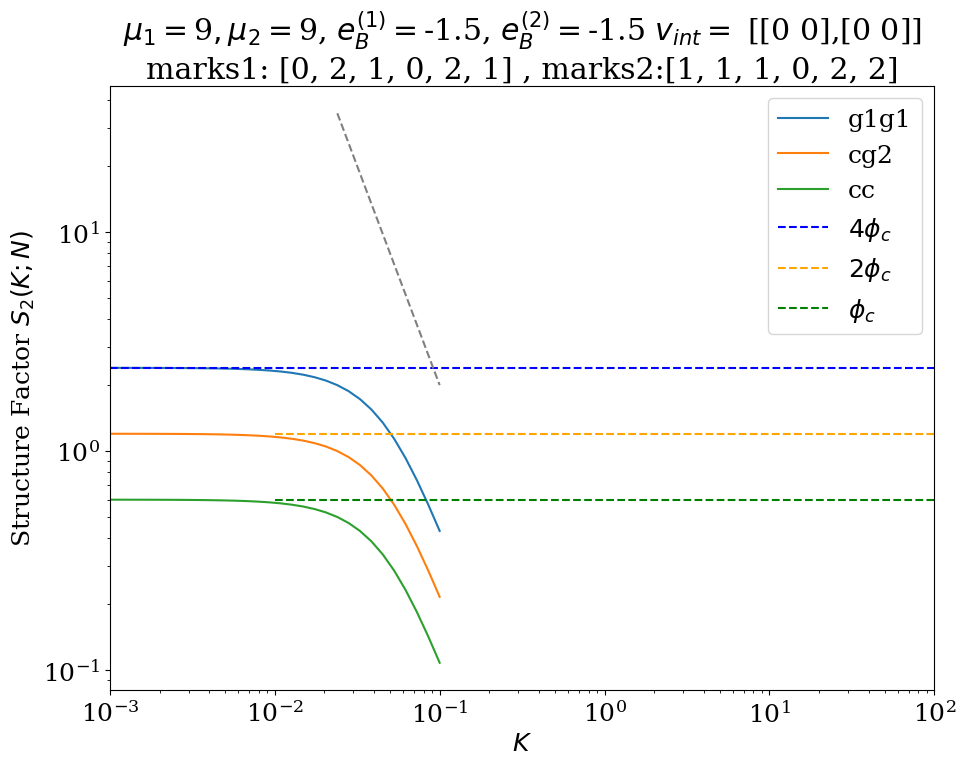

In [9]:
plt.figure(figsize=(10,8))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)
alh = 1
plt.plot(k_vec, S2_AA_arr/N**2, label = "g1g1", linestyle = "-", alpha = alh)
# plt.plot(k_vec, S2_BB_arr/N**2, label = "g2g2", linestyle = "-", alpha = alh)
# plt.plot(k_vec, S2_AB_arr/N**2, label = "g1g2", linestyle = "-", alpha = alh)
# plt.plot(k_vec, S2_BA_arr/N**2, label = "g2g1", linestyle="-", alpha = alh)

# plt.plot(k_vec, S2_cgam0_arr/N**2, label = "cg1", linestyle = "-")
plt.plot(k_vec, S2_cgam1_arr/N**2, label = "cg2", linestyle = "-")
plt.plot(k_vec, S2_cc_arr/N**2, label = "cc", linestyle = "-")
# plt.plot(k_vec, [1-phi_c]*len(k_vec), label = "ss", linestyle = "-")


# plt.plot(k_vec, S2_AA_red/N**2, label = "g1g1 red", linestyle = "--", alpha = alh)
# plt.plot(k_vec, S2_BB_red/N**2, label = "g2g2 red", linestyle = "--", alpha = alh)
# plt.plot(k_vec, S2_AB_red/N**2, label = "g1g2 red", linestyle = "--", alpha = alh)
# plt.plot(k_vec, S2_BA_red/N**2, label = "g2g1 red", linestyle="--", alpha = alh)

# plt.plot(k_vec, S2_cgam0_red/N**2, label = "cg1 red", linestyle = "--")
# plt.plot(k_vec, S2_cgam1_red/N**2, label = "cg2 red", linestyle = "--")
# plt.plot(k_vec, S2_cc_red/N**2, label = "cc red", linestyle = "--")


plt.hlines(phi_c*4, 0.001, 100, color = "blue", linestyle = "--", label = "$4\phi_c$")
plt.hlines(phi_c*2, 0.01, 100, color = "orange", linestyle = "--", label = "$2\phi_c$")
plt.hlines(phi_c, 0.01, 100, color = "green", linestyle = "--", label = "$\phi_c$")
# plt.hlines(1-phi_c, 0.01, 100, color = "red", linestyle = "--", label = "$1-\phi_c$")

low = 20
high = 30
plt.plot(k_vec[low:high], 0.02*k_vec[low:high]**-2, linestyle = "--", color = "grey")

# plt.text(5, 0.0035, '$k^{-2}$')
# plt.text(5.5, 0.0015, '$k^{-2}$')

plt.xscale('log')
plt.yscale('log')

# plt.title("S2")
plt.xlabel(r'$K$')
plt.ylabel(r'Structure Factor $S_{2}(K;N)$')
plt.xlim((1e-3, 1e2))

# plt.title("$v_{int} = $" + str(v_int) +  ", $e_B^{(1)} = $" + str(e_m[0]) + ", $e_B^{(2)} = $" + str(e_m[1]) + "$, \mu_1 = $" + str(mu[0]) \
#           + "$, \mu_2 = $" + str(mu[1]))

plt.title(r"$\mu_1 = $" + str(mu[0]) \
          + "$, \mu_2 = $" + str(mu[1]) +", $e_B^{(1)} = $" + \
          str(e_m[0]) + ", $e_B^{(2)} = $" + str(e_m[1]) \
          +  " $v_{int} = $ [" + str(v_int[0]) + "," + str(v_int[1]) + "]" +\
          "\n" "marks1: " + str(marks_1) + " , marks2:" + str(marks_2))

plt.tight_layout()
# plt.legend()
plt.legend(bbox_to_anchor=(1., 1.0))
plt.show()

In [10]:
b

1

In [11]:
# turn into function. returns rank 3 tensor of mu1, mu2 , k, each value is S2 matrix
min_eigval_arr = np.zeros((len(mu1_array[:]), len(mu2_array[:]), len(k_vec)))

S2_det_arr = np.zeros((len(mu1_array[:]), len(mu2_array[:]), len(k_vec[:])))

S2_cond_arr = np.zeros((len(mu1_array[:]), len(mu2_array[:]), len(k_vec[:])))

max_cond_arr_allk = np.zeros((len(mu1_array[:]), len(mu2_array[:])))

min_eigval_arr_allk = np.zeros((len(mu1_array[:]), len(mu2_array[:])))
k_star_arr = np.zeros((len(mu1_array[:]), len(mu2_array[:])))

s2_mat_orig =  np.zeros((len(mu1_array[:]), len(mu2_array[:]), len(k_vec)), dtype = "object")

for i, mu1 in enumerate(mu1_array[:]):
    for j, mu2 in enumerate(mu2_array[:]):
        mu = [mu1, mu2]
        f1 = f_gam_soln_arr[0][np.where(mu1_array == mu[0]), np.where(mu2_array== mu[1])][0][0]
        f2 = f_gam_soln_arr[1][np.where(mu1_array == mu[0]), np.where(mu2_array== mu[1])][0][0]
        f_bars = [f1, f2]

        s_bnd = np.zeros(6)
        for ib in range(n_bind*3):
            s_bnd[ib] = s_bind_soln_arr[ib][np.where(mu1_array == mu[0]), np.where(mu2_array== mu[1])][0][0]

        #TODO confirm these indices are correct
        indices_0 = np.tile(marks_1, (len(marks_1),1))#.T
        indices_1 = np.tile(marks_2, (len(marks_2),1)).T + 3

        cc = np.ones((len(marks_1), len(marks_1)))

        s_cgam0 = s_bnd[indices_0]
        s_cgam1 = s_bnd[indices_1]

        sisj_AA = eval_sisj_bind(f_bars, mu, e_m, v_int, f_om, phi_c, poly_marks, 0, 0)
        sisj_AB = eval_sisj_bind(f_bars, mu, e_m, v_int, f_om, phi_c, poly_marks, 0, 1)
        sisj_BA = eval_sisj_bind(f_bars, mu, e_m, v_int, f_om, phi_c, poly_marks, 1, 0)
        sisj_BB = eval_sisj_bind(f_bars, mu, e_m, v_int, f_om, phi_c, poly_marks, 1, 1)
        M2s = [sisj_AA,sisj_AB,sisj_BA,sisj_BB, s_cgam0, s_cgam1, cc]

        for ik, k in enumerate(k_vec):
            g1g1, g1g2, g2g1, g2g2, cg1, cg2, cc = phi_c * np.array(calc_sf2_chromo(poly_marks, N_m, b, M2s, [k]))            
            ss = 1-phi_c
            S2_mat = 1/N**2 * np.array([[cc[0], 0, cg1[0], cg2[0]],\
                            [0, ss*N**2, 0, 0], \
                            [cg1[0], 0, g1g1[0], g1g2[0]],\
                            [cg2[0], 0, g2g1[0], g2g2[0]]])

            s2_mat_orig[i][j][ik] = S2_mat

#             if phi_c >= 0.999:
#                 raise Exception("melt!")
#             S2_det = np.linalg.det(S2_mat)

#             S2_cond = np.linalg.cond(S2_mat)
#             S2_cond_arr_soln_2[i][j][ik] = S2_cond
#             S2_det_arr[i][j][ik] = S2_det
            
            
#             if S2_det != 0:# and S2_cond < 1e10:
#                 S2_inv = np.linalg.inv(S2_mat)

#                 G2 = (1/N)* np.array([[S2_inv[0,0] - 2*chi*N + S2_inv[1,1], S2_inv[0,2], S2_inv[0, 3]],\
#                    [S2_inv[2,0], S2_inv[2,2] + N*v_int[0,0], S2_inv[2,3] + N*v_int[0,1]],\
#                    [S2_inv[3,0], S2_inv[3,2] + N*v_int[1,0], S2_inv[3,3] + N*v_int[1,1]]])

#                 val, vec = np.linalg.eigh(G2)
#                 min_val = np.min(val)            
#                 min_eigval_arr[i][j][ik] = min_val


#         min_vals = min_eigval_arr[i][j][:][np.nonzero(min_eigval_arr[i][j][:])] # min eigvals at mu1,mu2 for each k
#         if len(min_vals) != 0:
#             minval_allk = np.min(min_vals) # minimum eigenvalue at mu1,mu2 across all ks
#             min_eigval_arr_allk[i][j] = minval_allk
            
#             k_star = k_vec[np.where(min_vals==minval_allk)] # corresponding k 
#             k_star_arr[i][j] = k_star


#         min_vals_melt = min_eigval_arr_melt[i][j][:] # min eigvals at mu1,mu2 for each k
#         minval_allk_melt = np.min(min_vals_melt) # minimum eigenvalue at mu1,mu2 across all ks
#         min_eigval_arr_allk_melt[i][j] = minval_allk_melt

#         cond_nums = S2_cond_arr_soln_2[i][j][:]
#         max_cond_allk = np.max(cond_nums)
#         max_cond_arr_allk[i][j] = max_cond_allk

In [12]:
from chromo_vertex import *

In [17]:
chrom = def_chrom(n_bind, v_int, chi, e_m, phi_c, poly_marks, mu_max, mu_min, del_mu)

f_gam, s_bind = calc_binding_states(chrom)

s2_mat_shlk = calc_sf_mats(chrom, f_gam, s_bind)

In [20]:
def signif(x, p):
    "converts every element in x to only p number of sig figs"
    x = np.asarray(x)
    x_positive = np.where(np.isfinite(x) & (x != 0), np.abs(x), 10**(p-1))
    mags = 10 ** (p - 1 - np.floor(np.log10(x_positive)))
    return np.round(x * mags) / mags

In [21]:
errors = 0
for i, mu1 in enumerate(mu1_array):
    for j, mu2 in enumerate(mu2_array):
        for ik, k in enumerate(k_vec):
            if np.sum(signif(s2_mat_orig[i][j][ik], 7) == signif(s2_mat_shlk[i][j][ik],7)) != 16:
#             if np.sum(s2_mat_orig[i][j][ik] == s2_mat_shlk[i][j][ik]) != 16:
                errors += 1
                print("mu1, mu2, ik:")
                print(i)
                print(j)
                print(ik)
#                 print(np.sum(s2_mat_orig[i][j][ik] == s2_mat_shlk[i][j][ik]))
            
        

In [22]:
errors

0